TUGAS 3 MANAJEMEN INDUSTRI - *Quantitative Forecasting*

JOHANES DE BRITTO **KRISNA** ARIANTA 
(21/473893/TK/52247)

*Quantitative Forecasting - Time Series*

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
# load data
data = pd.read_csv('BA_fiveyears.csv')
data['Date'] = pd.to_datetime(data['Date'])  
data.set_index('Date', inplace=True)  

In [111]:
# calculate SMA (Simple Moving Average)
window = 7  
data['SMA_Open'] = data['Open'].rolling(window=window).mean()
data['SMA_High'] = data['High'].rolling(window=window).mean()
data['SMA_Low'] = data['Low'].rolling(window=window).mean()

# predict close prices
data['Close_Predict'] = (data['SMA_Open'] + data['SMA_High'] + data['SMA_Low']) / 3

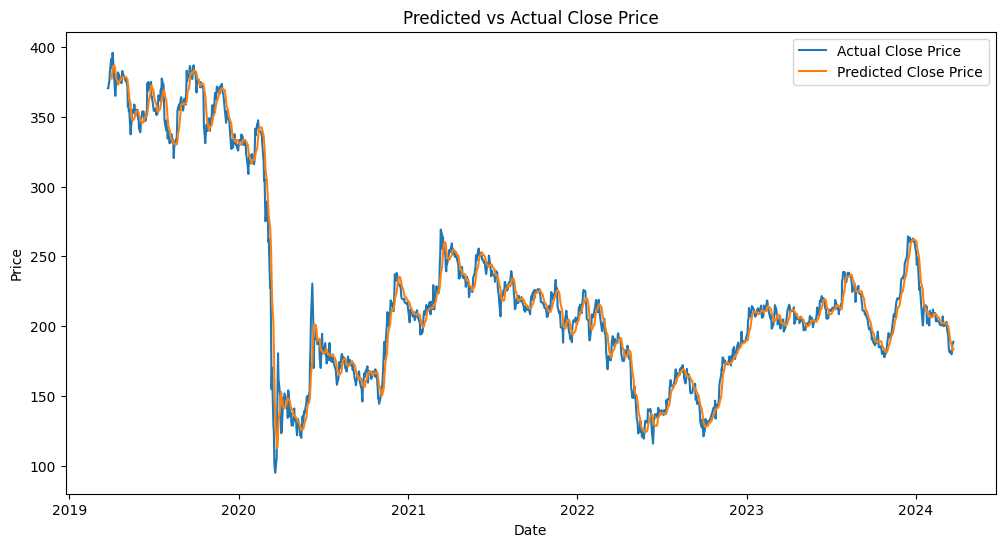

In [112]:
# plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(data.index, data['Close_Predict'], label='Predicted Close Price')
plt.title('Predicted vs Actual Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [113]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [114]:
# calculate SMA
window = 7  
data['SMA_Close'] = data['Close'].rolling(window=window).mean()

# fit ARIMA models on SMA
model = ARIMA(data['SMA_Close'].dropna(), order=(5,2,1))  
model_fit = model.fit()

# future predictions for the next 30 days
forecast_1_month = model_fit.forecast(steps=30)
future_dates_1_month = pd.date_range(start=data.index[-1], periods=31)[1:] 


c:\Users\JB Krisna A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\JB Krisna A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\JB Krisna A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\JB Krisna A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: N

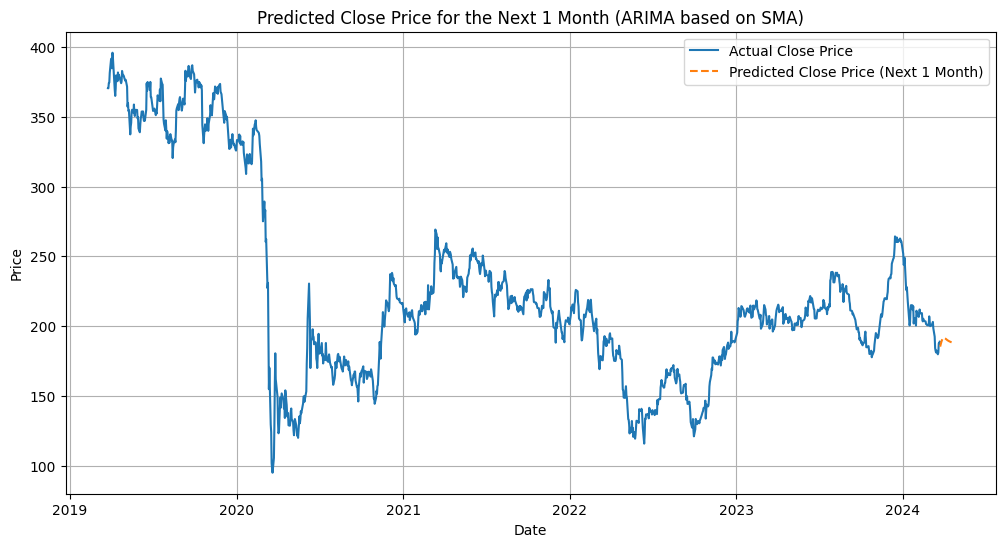

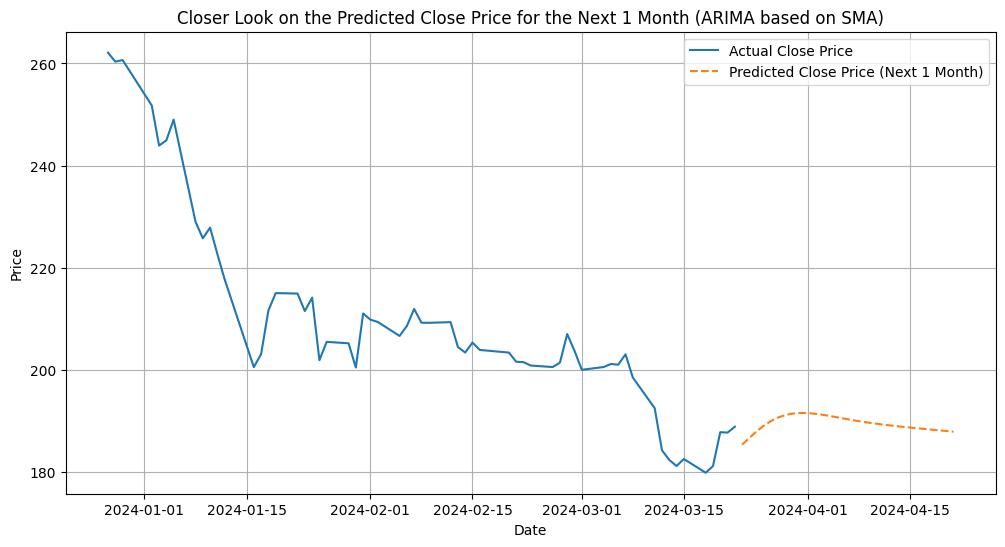

In [115]:
# plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(future_dates_1_month, forecast_1_month, label='Predicted Close Price (Next 1 Month)', linestyle='--')
plt.title('Predicted Close Price for the Next 1 Month (ARIMA based on SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# zoomed-in plot
plt.figure(figsize=(12, 6))
plt.plot(data.index[-60:], data['Close'].tail(60), label='Actual Close Price')  # Plot the last 60 days
plt.plot(future_dates_1_month, forecast_1_month, label='Predicted Close Price (Next 1 Month)', linestyle='--')
plt.title('Closer Look on the Predicted Close Price for the Next 1 Month (ARIMA based on SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

*Quantitative Forecasting - Causal*

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [117]:
# split the data into features and target
X = data[['Open', 'High', 'Low']]  # features
y = data['Close']  # target 

# spilt the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict close
close_predict = model.predict(X_test)

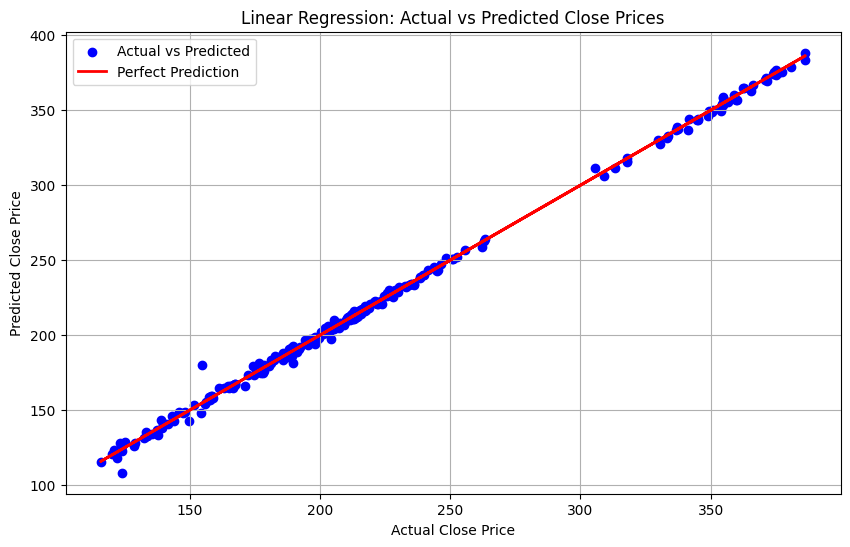

In [119]:
# plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, close_predict, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')  
plt.title('Linear Regression: Actual vs Predicted Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [120]:
# function to predict
def predict_close(open_price, high_price, low_price):
    new_data_point = [[open_price, high_price, low_price]]
    close_predict = model.predict(new_data_point)
    return close_predict[0]

# replace the values to test
open_price = 100  
high_price = 100  
low_price = 100    

predicted_close = predict_close(open_price, high_price, low_price)
print("Predicted Close Price:", predicted_close)


Predicted Close Price: 99.88097112127213


c:\Users\JB Krisna A\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
